In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import urllib.request

In [2]:
authors=[]
quotes=[]


In [3]:
def scrap(authorName,pageNum):
    pageNum=str(pageNum)
    URL='https://www.goodreads.com/author/quotes/'+authorName+pageNum
    webpage=requests.get(URL)
    soup=BeautifulSoup(webpage.text,'html.parser')
    quoteText=soup.find_all('div',attrs={'class':'quoteText'})
    for i in quoteText:
        quote=i.text.strip().split('\n')[0]
        quotes.append(quote)
        author=i.find('span',attrs={'class':'authorOrTitle'}).text.strip()
        authors.append(author)
    

In [4]:
authorName=['80592.Vivekananda','12793.Charles_Darwin','879.Plato','2192.Aristotle','1173661.Adi_Shankaracharya','367338.Nelson_Mandela','7084.Karl_Marx','275648.Socrates','30691.Adolf_Hitler','138332.Joseph_Stalin']

In [5]:
num=10
for i in authorName:
    for j in range(0,num):
        scrap(i,j)
        

In [6]:
quotes

['“Take up one idea. Make that one idea your life; dream of it; think of it; live on that idea. Let the brain, the body, muscles, nerves, every part of your body be full of that idea, and just leave every other idea alone. This is the way to success, and this is the way great spiritual giants are produced.”',
 '“You have to grow from the inside out. None can teach you, none can make you spiritual. There is no other teacher but your own soul.”',
 '“In a conflict between the heart and the brain, follow your heart. ”',
 "“In a day, when you don't come across any problems - you can be sure that you are travelling in a wrong path”",
 '“The great secret of true success, of true happiness, is this: the man or woman who asks for no return, the perfectly unselfish person, is the most successful.”',
 '“All power is within you; you can do anything and everything. Believe in that, do not believe that you are weak; do not believe that you are half-crazy lunatics, as most of us do nowadays. You can 

In [7]:
len(quotes)

2940

In [58]:
import numpy as np
arr=np.arange(2941)
df=pd.DataFrame(list(zip(arr+1,quotes,authors)),columns=['id','quotes','authors'])

In [61]:
df.sample(frac=1)


,id,quotes,authors
1032,1033,“Those who educate children well are more to b...,Aristotle
2115,2116,“No man has the right to be an amateur in the ...,Socrates
72,73,"“They alone live, who live for others.”",Swami Vivekananda
102,103,"“They alone live, who live for others.”",Swami Vivekananda
2014,2015,“The foundation of irreligious criticism is: M...,"Karl Marx,"
...,...,...,...
1767,1768,"“There is no royal road to science, and only t...","Karl Marx,"
646,647,"“I'm trying to think, don't confuse me with fa...",Plato
337,338,“I am not apt to follow blindly the lead of ot...,Charles Darwin
2033,2034,“Under no pretext should arms and ammunition b...,Karl Marx


In [62]:
df.to_csv('ideology.csv')

In [86]:
df['quotes'] = df['quotes'].str.replace(r'“', '')
df['quotes'] = df['quotes'].str.replace(r'”', '')

In [87]:
df.to_csv('ideology2.csv')

In [89]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [91]:
import os
import sys
import datetime
import numpy as np
import pandas as pd 
import tensorflow as tf
import zipfile
from matplotlib import pyplot as plt

In [104]:
print(df.authors.value_counts())
df.head()

swami vivekanand                                      300
socrates                                              300
plato                                                 300
aristotle                                             300
charles darwin                                        300
nelson mandela                                        300
adolf hitler                                          300
karl marx                                             280
joseph stalin                                         260
adi adi adi shankaracharyacharyacharyacharyacharya    100
adi adi adi shankaracharyacharyacharyacharyacarya      80
josef stalin                                           30
adi adi shankaracharyacharyacharya                     30
sankaracarya                                           10
karl marx                                              10
karl marx and friedrich engels                         10
adi adi shankaracharyacharyacharyacharya               10
adi adi adi sh

,id,quotes,authors
0,1,Take up one idea. Make that one idea your life...,swami vivekanand
1,2,You have to grow from the inside out. None can...,swami vivekanand
2,3,"In a conflict between the heart and the brain,...",swami vivekanand
3,4,"In a day, when you don't come across any probl...",swami vivekanand
4,5,"The great secret of true success, of true happ...",swami vivekanand


In [103]:
df['authors'] = df['authors'].str.replace(r',', '')
df['authors'] = df['authors'].str.lower()
df['authors'] = df['authors'].str.replace('swami vivekananda','swami vivekanand')
df['authors'] = df['authors'].str.replace('swami vivekanand ','swami vivekanand')
df['authors'] = df['authors'].str.replace('adi shankara','adi shankaracharya')
df['authors'] = df['authors'].str.replace('shankara','adi shankaracharya')




In [105]:
df['authors'] = df['authors'].str.replace('adi adi adi shankaracharyacharyacharyacharya','adi shankaracharya')

In [106]:
print(df.authors.value_counts())

swami vivekanand                            300
socrates                                    300
plato                                       300
aristotle                                   300
charles darwin                              300
nelson mandela                              300
adolf hitler                                300
karl marx                                   280
joseph stalin                               260
adi shankaracharyacharya                    100
adi shankaracharyacarya                      80
josef stalin                                 30
adi adi shankaracharyacharyacharya           30
sankaracarya                                 10
karl marx                                    10
karl marx and friedrich engels               10
adi adi shankaracharyacharyacharyacharya     10
adi shankaracharya                           10
stalin                                       10
Name: authors, dtype: int64


In [107]:
df['authors'] = df['authors'].str.replace('adi adi shankaracharyacharyacharyacharya','adi shankaracharya')
df['authors'] = df['authors'].str.replace('adi shankaracharya','adi shankaracharya')

In [108]:
print(df.authors.value_counts())

swami vivekanand                      300
charles darwin                        300
adolf hitler                          300
socrates                              300
nelson mandela                        300
aristotle                             300
plato                                 300
karl marx                             280
joseph stalin                         260
adi shankaracharyacharya              100
adi shankaracharyacarya                80
adi adi shankaracharyacharyacharya     30
josef stalin                           30
adi shankaracharya                     20
sankaracarya                           10
karl marx and friedrich engels         10
karl marx                              10
stalin                                 10
Name: authors, dtype: int64


In [109]:
df['authors'] = df['authors'].str.replace('sankaracarya','adi shankaracharya')
df['authors'] = df['authors'].str.replace('adi adi shankaracharyacharyacharya','adi shankaracharya')


In [110]:
print(df.authors.value_counts())

swami vivekanand                  300
charles darwin                    300
plato                             300
aristotle                         300
nelson mandela                    300
socrates                          300
adolf hitler                      300
karl marx                         280
joseph stalin                     260
adi shankaracharyacharya          100
adi shankaracharyacarya            80
adi shankaracharya                 60
josef stalin                       30
karl marx and friedrich engels     10
karl marx                          10
stalin                             10
Name: authors, dtype: int64


In [111]:
df['authors'] = df['authors'].str.replace('adi shankaracharyacharya','adi shankaracharya')
df['authors'] = df['authors'].str.replace('adi shankaracharyacarya','adi shankaracharya')


In [112]:
print(df.authors.value_counts())

swami vivekanand                  300
charles darwin                    300
plato                             300
aristotle                         300
nelson mandela                    300
socrates                          300
adolf hitler                      300
karl marx                         280
joseph stalin                     260
adi shankaracharya                240
josef stalin                       30
karl marx and friedrich engels     10
karl marx                          10
stalin                             10
Name: authors, dtype: int64


In [113]:
df['authors'] = df['authors'].str.replace('karl marx and friedrich engels','karl marx')
df['authors'] = df['authors'].str.replace('karl marx ','karl marx')

In [114]:
print(df.authors.value_counts())

swami vivekanand      300
charles darwin        300
plato                 300
aristotle             300
nelson mandela        300
socrates              300
adolf hitler          300
karl marx             290
joseph stalin         260
adi shankaracharya    240
josef stalin           30
karl marx              10
stalin                 10
Name: authors, dtype: int64


In [115]:
df['authors'] = df['authors'].str.replace('karl marx ','karl marx')

In [130]:
print(df.authors.value_counts())

swami vivekanand      300
charles darwin        300
plato                 300
aristotle             300
nelson mandela        300
karl marx             300
socrates              300
adolf hitler          300
stalin                300
adi shankaracharya    240
Name: authors, dtype: int64


In [129]:
df['authors'] = df['authors'].str.replace('josef stalin','stalin')


In [132]:
df.to_csv('ideology4.csv')

In [133]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!wget https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/optimization.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/run_classifier.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/tokenization.py 

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [134]:
pip install bert-for-tf2

  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=bbefb5cfb93c55a8d308a230c9eccdc0b138cf8f1b4a2d1a85f9279ee9a00afb
  Stored in directory: c:\users\shashwat saket\appdata\local\pip\cache\wheels\6f\c7\91\f2b2c2b3cec30578c5de7c27ac99659a2013501dd66e7e3db0
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19473 sha256=717c5c28522c1952a8abc00f267a2f9a5a2288326958e9e9bc535671ce2ac80d
  Stored in directory: c:\users\shashwat saket\appdata\local\pip\cache\wheels\be\17\6c\5c924411a614ee0a74b2dc4f04c9e61dacc4e60fe9854f4f70
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7912 sha256=dd89b3d981dee33a33704cc640f44075cf4ee481bafac751488968a23502eef1
  Stored in directory: c:\users\shashwat saket\appdata\local\pip\cache\wheels\29\ff\b1\77192657c3311dcae256412a7f36f73b064ace9c98312f5347
Successfully built bert-for-tf2 params-flow py-params
Note: you may need to restart the kernel to use updat

In [135]:
import nltk
import re
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_data(text) : 
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(df['quotes'],df['authors'],test_size = 0.3, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_data)
tfidf_vect_fit = tfidf_vect.fit(x_train)

tfidf_train = tfidf_vect_fit.transform(x_train)
tfidf_valid  = tfidf_vect_fit.transform(x_valid)
x_train_vect = pd.DataFrame(tfidf_train.toarray())
x_valid_vect = pd.DataFrame(tfidf_valid.toarray())

In [140]:
x_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
x_valid_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.26075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import plot_confusion_matrix

In [145]:
nb = MultinomialNB()
param = {'alpha':[0.01, 0.1, 1,10, 100]}

gsn = GridSearchCV(nb, param, cv=5) 
gb_fit = gsn.fit(x_train_vect,y_train)
pd.DataFrame(gb_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050425,0.033959,0.013279,0.001667,0.01,{'alpha': 0.01},0.995146,0.995146,1.00000,0.995134,0.995134,0.996112,0.001944,1
1,0.036234,0.004399,0.011385,0.002255,0.1,{'alpha': 0.1},0.995146,0.995146,1.00000,0.995134,0.995134,0.996112,0.001944,1
2,0.032201,0.003572,0.010541,0.000482,1,{'alpha': 1},0.995146,0.990291,0.98301,0.995134,0.990268,0.990770,0.004447,3


In [146]:
y_pred_nb = gsn.best_estimator_.predict(x_valid_vect)
precision,recall,fscore,support = score(y_valid,y_pred_nb, average='weighted')
print('precision:{}, recall:{}, accuracy:{}'.format(round(precision,3), round(recall,3), round((y_valid==y_pred_nb).sum()/len(y_pred_nb) ,3)))

precision:0.995, recall:0.994, accuracy:0.994


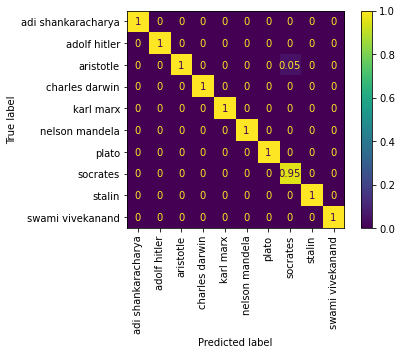

In [147]:
plot_confusion_matrix(gsn.best_estimator_, x_valid_vect, y_valid, normalize='pred',xticks_rotation ='vertical')

In [148]:
lr = LogisticRegression()
param = {'C' : [0.01,0.1,1,10,100], 'max_iter': [100000]}

gsl = GridSearchCV(lr, param, cv=5) 
lr_fit = gsl.fit(x_train_vect,y_train)
pd.DataFrame(lr_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.952199,0.062072,0.013400,0.002059,10,100000,"{'C': 10, 'max_iter': 100000}",1.000000,1.0,1.000000,0.997567,1.000000,0.999513,0.000973,1
4,1.299026,0.167059,0.013802,0.002582,100,100000,"{'C': 100, 'max_iter': 100000}",1.000000,1.0,1.000000,0.997567,1.000000,0.999513,0.000973,1
2,0.672246,0.151457,0.011401,0.001496,1,100000,"{'C': 1, 'max_iter': 100000}",0.995146,1.0,0.990291,0.995134,0.995134,0.995141,0.003070,3


In [149]:
y_pred_lr = gsl.best_estimator_.predict(x_valid_vect)
precision,recall,fscore,support = score(y_valid,y_pred_lr, average='weighted')
print('precision:{}, recall:{}, accuracy:{}'.format(round(precision,3), round(recall,3), round((y_valid==y_pred_lr).sum()/len(y_pred_lr) ,3)))

precision:1.0, recall:1.0, accuracy:1.0


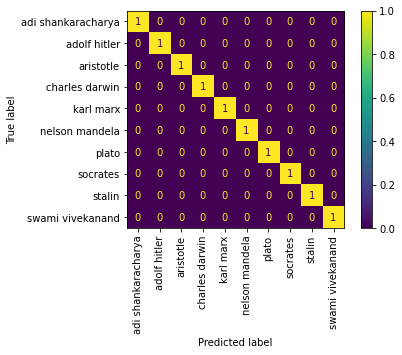

In [150]:
plot_confusion_matrix(gsl.best_estimator_, x_valid_vect, y_valid, normalize='pred',xticks_rotation ='vertical')

In [151]:
rf = RandomForestClassifier()
param = {'n_estimators': [100,200],'max_depth' : [None] , 'n_jobs' : [-1]}

gs = GridSearchCV(rf, param, cv=3)
rf_fit = gs.fit(x_train_vect,y_train)
pd.DataFrame(rf_fit.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.180870,2.068685,0.060120,0.000827,None,100,-1,"{'max_depth': None, 'n_estimators': 100, 'n_jo...",1.0,0.998542,1.0,0.999514,0.000687,1
1,1.365185,0.089124,0.096193,0.004122,None,200,-1,"{'max_depth': None, 'n_estimators': 200, 'n_jo...",1.0,0.998542,1.0,0.999514,0.000687,1


In [152]:
y_pred_rf = gs.best_estimator_.predict(x_valid_vect)
precision,recall,fscore,support = score(y_valid,y_pred_rf, average='weighted')
print('precision:{}, recall:{}, accuracy:{}'.format(round(precision,3), round(recall,3), round((y_valid==y_pred_rf).sum()/len(y_pred_rf) ,3)))

precision:1.0, recall:1.0, accuracy:1.0


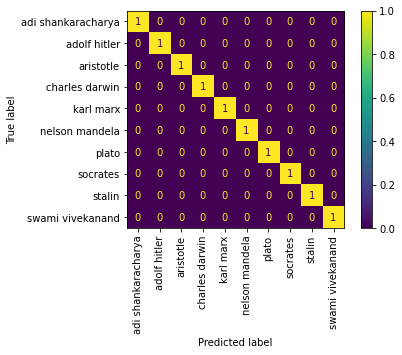

In [153]:
plot_confusion_matrix(gs.best_estimator_, x_valid_vect, y_valid, normalize='pred', xticks_rotation ='vertical' )

In [154]:
!pip install afinn
from afinn import Afinn
af = Afinn()

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=51ce1f2308f7ef9fb49ab0b288096ec38ab97a90641251034ce25eb371755b28
  Stored in directory: c:\users\shashwat saket\appdata\local\pip\cache\wheels\79\91\ee\8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


In [156]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [158]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [160]:
pip install optuna

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\typing_extensions.cpython-39.pyc'
Consider using the `--user` option or check the permissions.



In [163]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os,string,path

#wordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from urllib.request import urlopen
from PIL import Image

#Text Processing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%matplotlib inline

#ML Model
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgbm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

#Optimisation
import pickle

In [164]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

def countplot(df, x, x_axis_title,y_axys_title, plot_title):
    plt.figure(figsize=(20,8))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.countplot(data = df,x=x,order = df[x].value_counts().index,palette="Blues_d")
    for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(0, 3),rotation = 'horizontal',textcoords='offset points')
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=0,fontsize = 12)
    ax.set_xlabel(x_axis_title,fontsize = 14,weight = 'bold')
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False)  
    plt.title(plot_title, fontsize = 16,weight = 'bold')  

def preprocess_sentence(df): #returns the whole sentence, with preprocessed text
    word_list = []
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', df) #remove punctuations
    #text = text.lower() #lower case
    tokenized_word=word_tokenize(text) #separate into words
    for word in tokenized_word:
        if word not in stop_words: #filter stop-words
            word = stem.stem(word) #stemming
            word_list.append(word) #append to general list
    return ' '.join(word_list) #rejoins the sentence without the stopwords

def process_list(text): #returns a list of preprocessed words
        word_list = []
        #for t in text:            
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text) #remove punctuations
        text = text.lower() #lower case
        tokenized_word=word_tokenize(text) #separate into words
        for word in tokenized_word:
            if word not in stop_words: #filter stop-words
                word = stem.stem(word) #stemming
                word_list.append(word) #append to general list
        return word_list
    
def build_freqs(texts, author):
    authorslist = np.squeeze(author).tolist()
    # Start with an empty dictionary and populate it by looping over all samples
    # and over all processed words in each sample.
    freqs = {}
    words_sample = []
    for text, author in zip(texts,authorslist):
        for word in process_list(text):
            words_sample.append(word)
            pair = (word, author)
            freqs[pair] = freqs.get(pair, 0) + 1  
    return freqs,words_sample

stop_words=set(stopwords.words("english"))
stem = PorterStemmer()

Number of Samples: 2940,
Number of Features: 3,
Duplicated Entries: 0,
Null Entries: 0,
Number of Rows with Null Entries: 0 0.0%


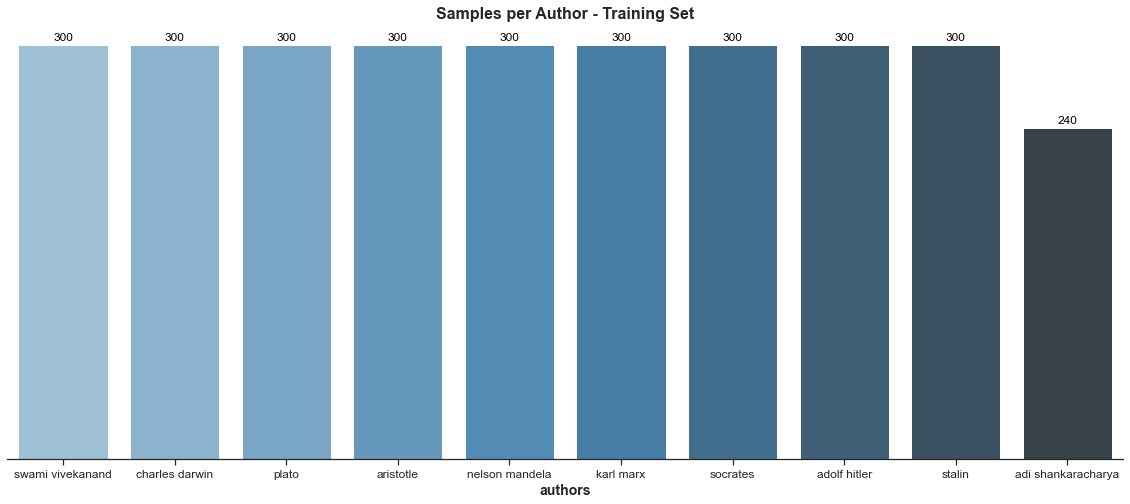

In [169]:
basic_EDA(df)
countplot(df, 'authors', 'authors','Count', 'Samples per Author - Training Set')

In [216]:
punctuations = string.punctuation

def new_feat(df):
    df['word_count'] = df['quotes'].apply(lambda x : len(x.split()))
    df['char_count'] = df['quotes'].apply(lambda x : len(x.replace(" ","")))
    df['word_density'] = df['word_count'] / (df['char_count'] + 1)

    #Adding +1 to allow ratio calculation
    df['Uppercase'] = df['quotes'].str.findall(r'[A-Z]').str.len()+1
    df['Lowercase'] = df['quotes'].str.findall(r'[a-z]').str.len()+1
    df['UppLowRatio'] = df['Uppercase'] / (df['Lowercase'] + 1)

    df['punc_count'] = df['quotes'].apply(lambda x : len([a for a in x if a in punctuations]))
    
    return df

df_train_new = new_feat(df)
df_train_new

C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_35180/3839651376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['quotes'].apply(lambda x : len(x.split()))
C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_35180/3839651376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count'] = df['quotes'].apply(lambda x : len(x.replace(" ","")))
C:\Users\SHASHW~1\AppData\Local\Temp/ipykernel_35180/3839651376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,quotes,authors,score,sentiment_category,word_count,char_count,word_density,Uppercase,Lowercase,UppLowRatio,punc_count
2640,A single death is a tragedy; a million deaths ...,stalin,-6.0,negative,12,50,0.235294,2,48,0.040816,2
2641,Those who vote decide nothing. Those who count...,stalin,0.0,neutral,12,63,0.187500,3,60,0.049180,2
2642,"Education is a weapon, whose effect depends on...",stalin,0.0,neutral,20,78,0.253165,2,76,0.025974,2
2643,This creature softened my heart of stone. She ...,stalin,-5.0,negative,19,86,0.218391,3,83,0.035714,2
2644,"It is not heroes that make history, but histor...",stalin,4.0,positive,12,55,0.214286,2,53,0.037037,2
...,...,...,...,...,...,...,...,...,...,...,...
2935,We don't let them have ideas. Why would we let...,stalin,0.0,neutral,13,50,0.254902,3,46,0.063830,3
2936,Advance towards socialism cannot but cause the...,stalin,-4.0,negative,30,165,0.180723,2,163,0.012195,2
2937,History shows that there are no invincible arm...,stalin,1.0,positive,8,43,0.181818,2,42,0.046512,1
2938,"Undoubtedly, our path is not of the easiest; b...",stalin,-1.0,negative,82,372,0.219839,12,348,0.034384,13


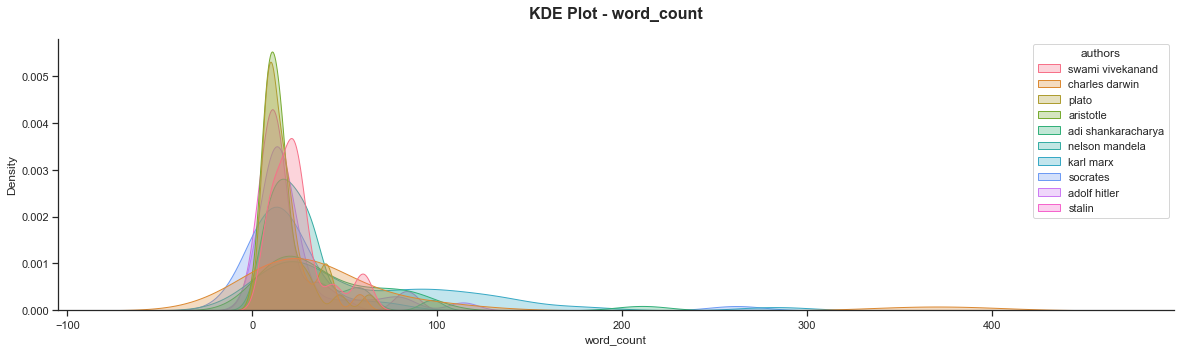

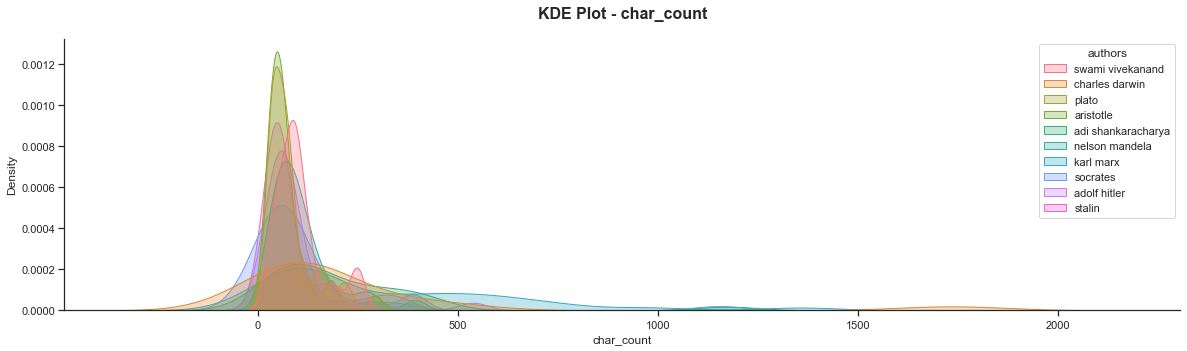

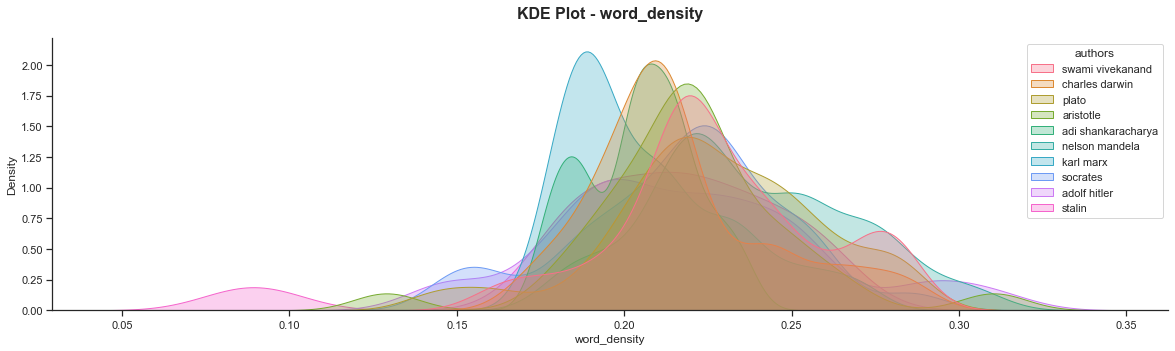

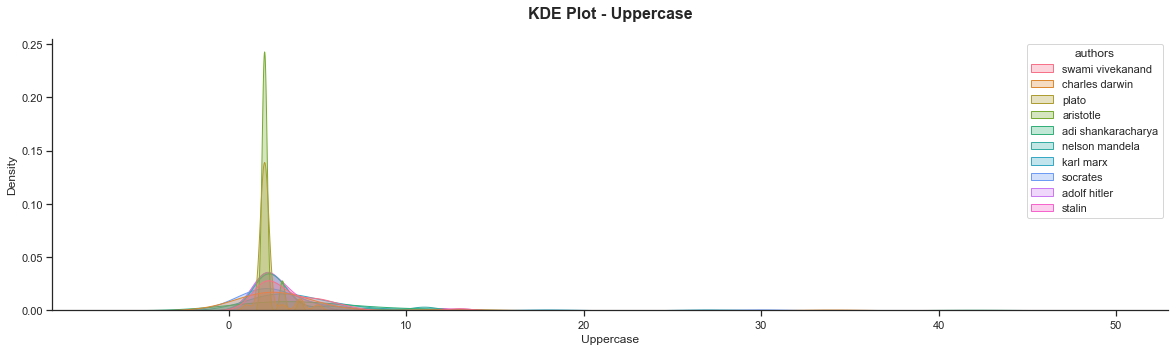

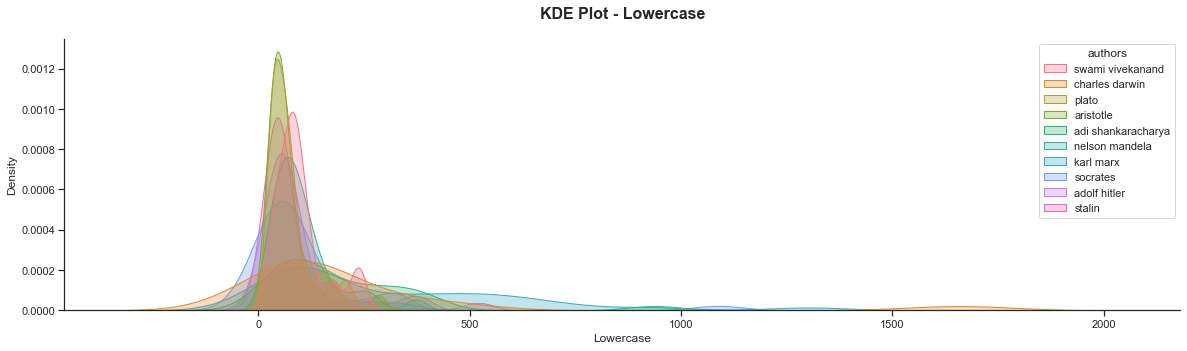

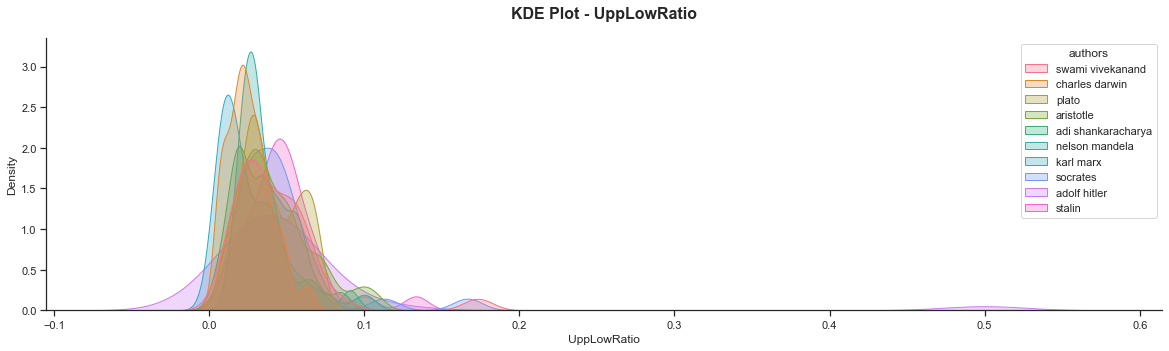

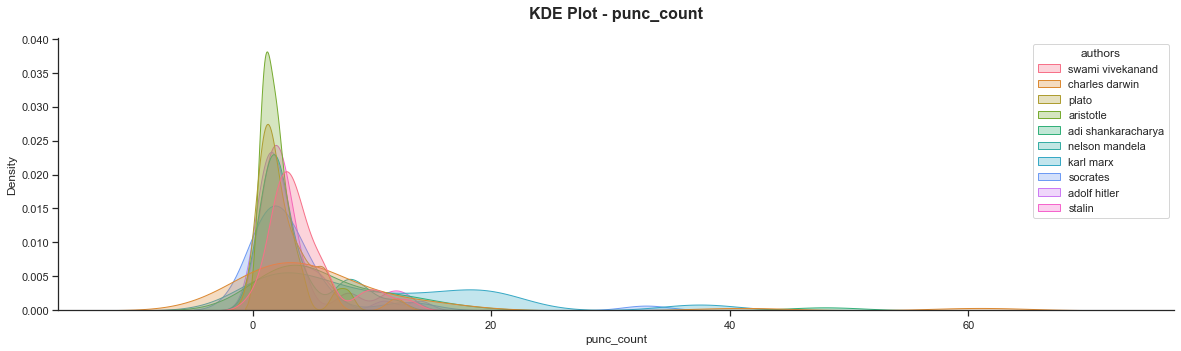

In [173]:
feat_list = ['word_count','char_count','word_density','Uppercase','Lowercase','UppLowRatio','punc_count']

for i in feat_list:
    plt.figure(figsize=(20,5))
    ax = sns.kdeplot(data = df_train_new, x = i, linewidth=1,alpha=.3, fill = True, hue = 'authors',palette = 'husl') 
    ax.set_xlabel(i)
    plt.title('KDE Plot - ' + i, fontsize = 16,weight = 'bold',pad=20);  
    sns.despine(top=True, right=True, left=False, bottom=False)

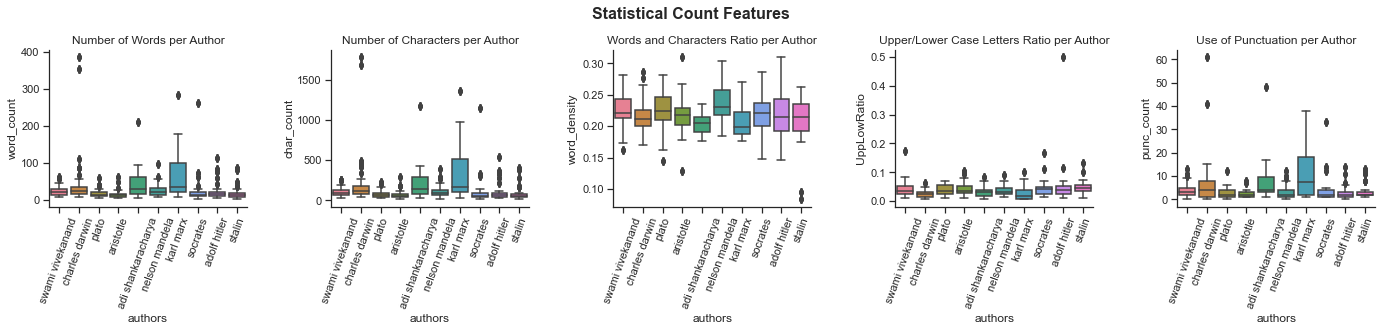

In [176]:
fig, axarr = plt.subplots(1,5, figsize=(20, 5))

sns.set(style="ticks", font_scale = 1)
sns.despine(top=True, right=True, left=False, bottom=False)

feats = ['word_count','char_count','word_density','UppLowRatio','punc_count']
z = 0
for j in range(0,5):
    ax = sns.boxplot(data = df, x = 'authors', y = df[feats[z]], ax=axarr[j],palette = 'husl');
    axarr[j].tick_params(axis='x', rotation=70)
    z +=1

axarr[0].set_title("Number of Words per Author")
axarr[1].set_title("Number of Characters per Author")
axarr[2].set_title("Words and Characters Ratio per Author")
axarr[3].set_title("Upper/Lower Case Letters Ratio per Author")
axarr[4].set_title("Use of Punctuation per Author")

fig.tight_layout(pad=3.0)
plt.suptitle('Statistical Count Features',fontsize=16, weight = 'bold');

plt.show()

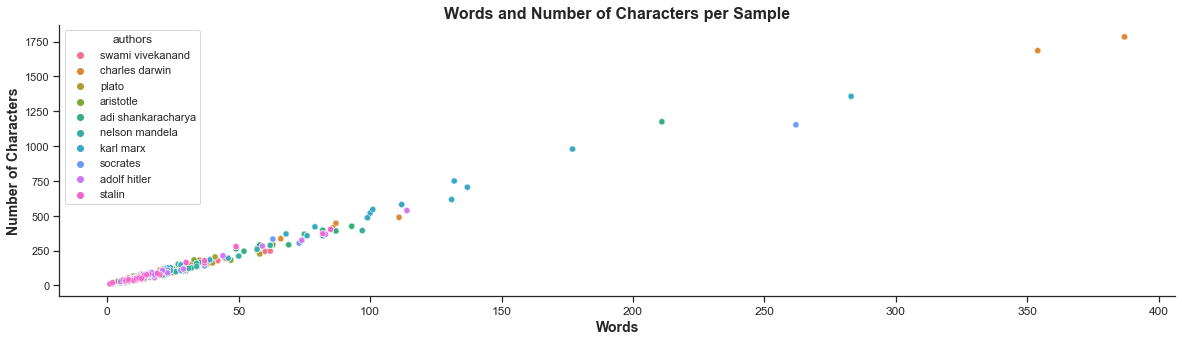

In [178]:
plt.figure(figsize=(20,5))
sns.set(style="ticks", font_scale = 1)
ax = sns.scatterplot(data=df, x="word_count", y='char_count', hue = 'authors',alpha=0.8, palette = 'husl');
#ax.set(xscale="log", yscale="log")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Words',fontsize = 14,weight = 'bold')
ax.set_ylabel('Number of Characters',fontsize = 14,weight = 'bold')
plt.title('Words and Number of Characters per Sample', fontsize = 16,weight = 'bold');

In [180]:
sentiment_scores = [af.score(text) for text in df['quotes']]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
sentiment_df = pd.DataFrame([list(df['quotes']), list(df['authors']),sentiment_scores, sentiment_category]).T
sentiment_df.columns = ['quotes', 'authors','score', 'sentiment_category']
sentiment_df['score'] = sentiment_df.score.astype('float')
sentiment_df.head()

,quotes,authors,score,sentiment_category
0,Take up one idea. Make that one idea your life...,swami vivekanand,2.0,positive
1,You have to grow from the inside out. None can...,swami vivekanand,-1.0,negative
2,"In a conflict between the heart and the brain,...",swami vivekanand,-2.0,negative
3,"In a day, when you don't come across any probl...",swami vivekanand,-4.0,negative
4,"The great secret of true success, of true happ...",swami vivekanand,19.0,positive


In [184]:
sentiment_df.loc[sentiment_df['score'].idxmax()]

quotes                प्रातः स्मरामि हृदि संस्फुरदात्मतत्त्वंसच्चित्...
authors                                              adi shankaracharya
score                                                              29.0
sentiment_category                                             positive
Name: 1214, dtype: object

In [185]:
sentiment_df.loc[sentiment_df['score'].idxmin()]

quotes                The foundation of irreligious criticism is: Ma...
authors                                                       karl marx
score                                                             -17.0
sentiment_category                                             negative
Name: 1744, dtype: object

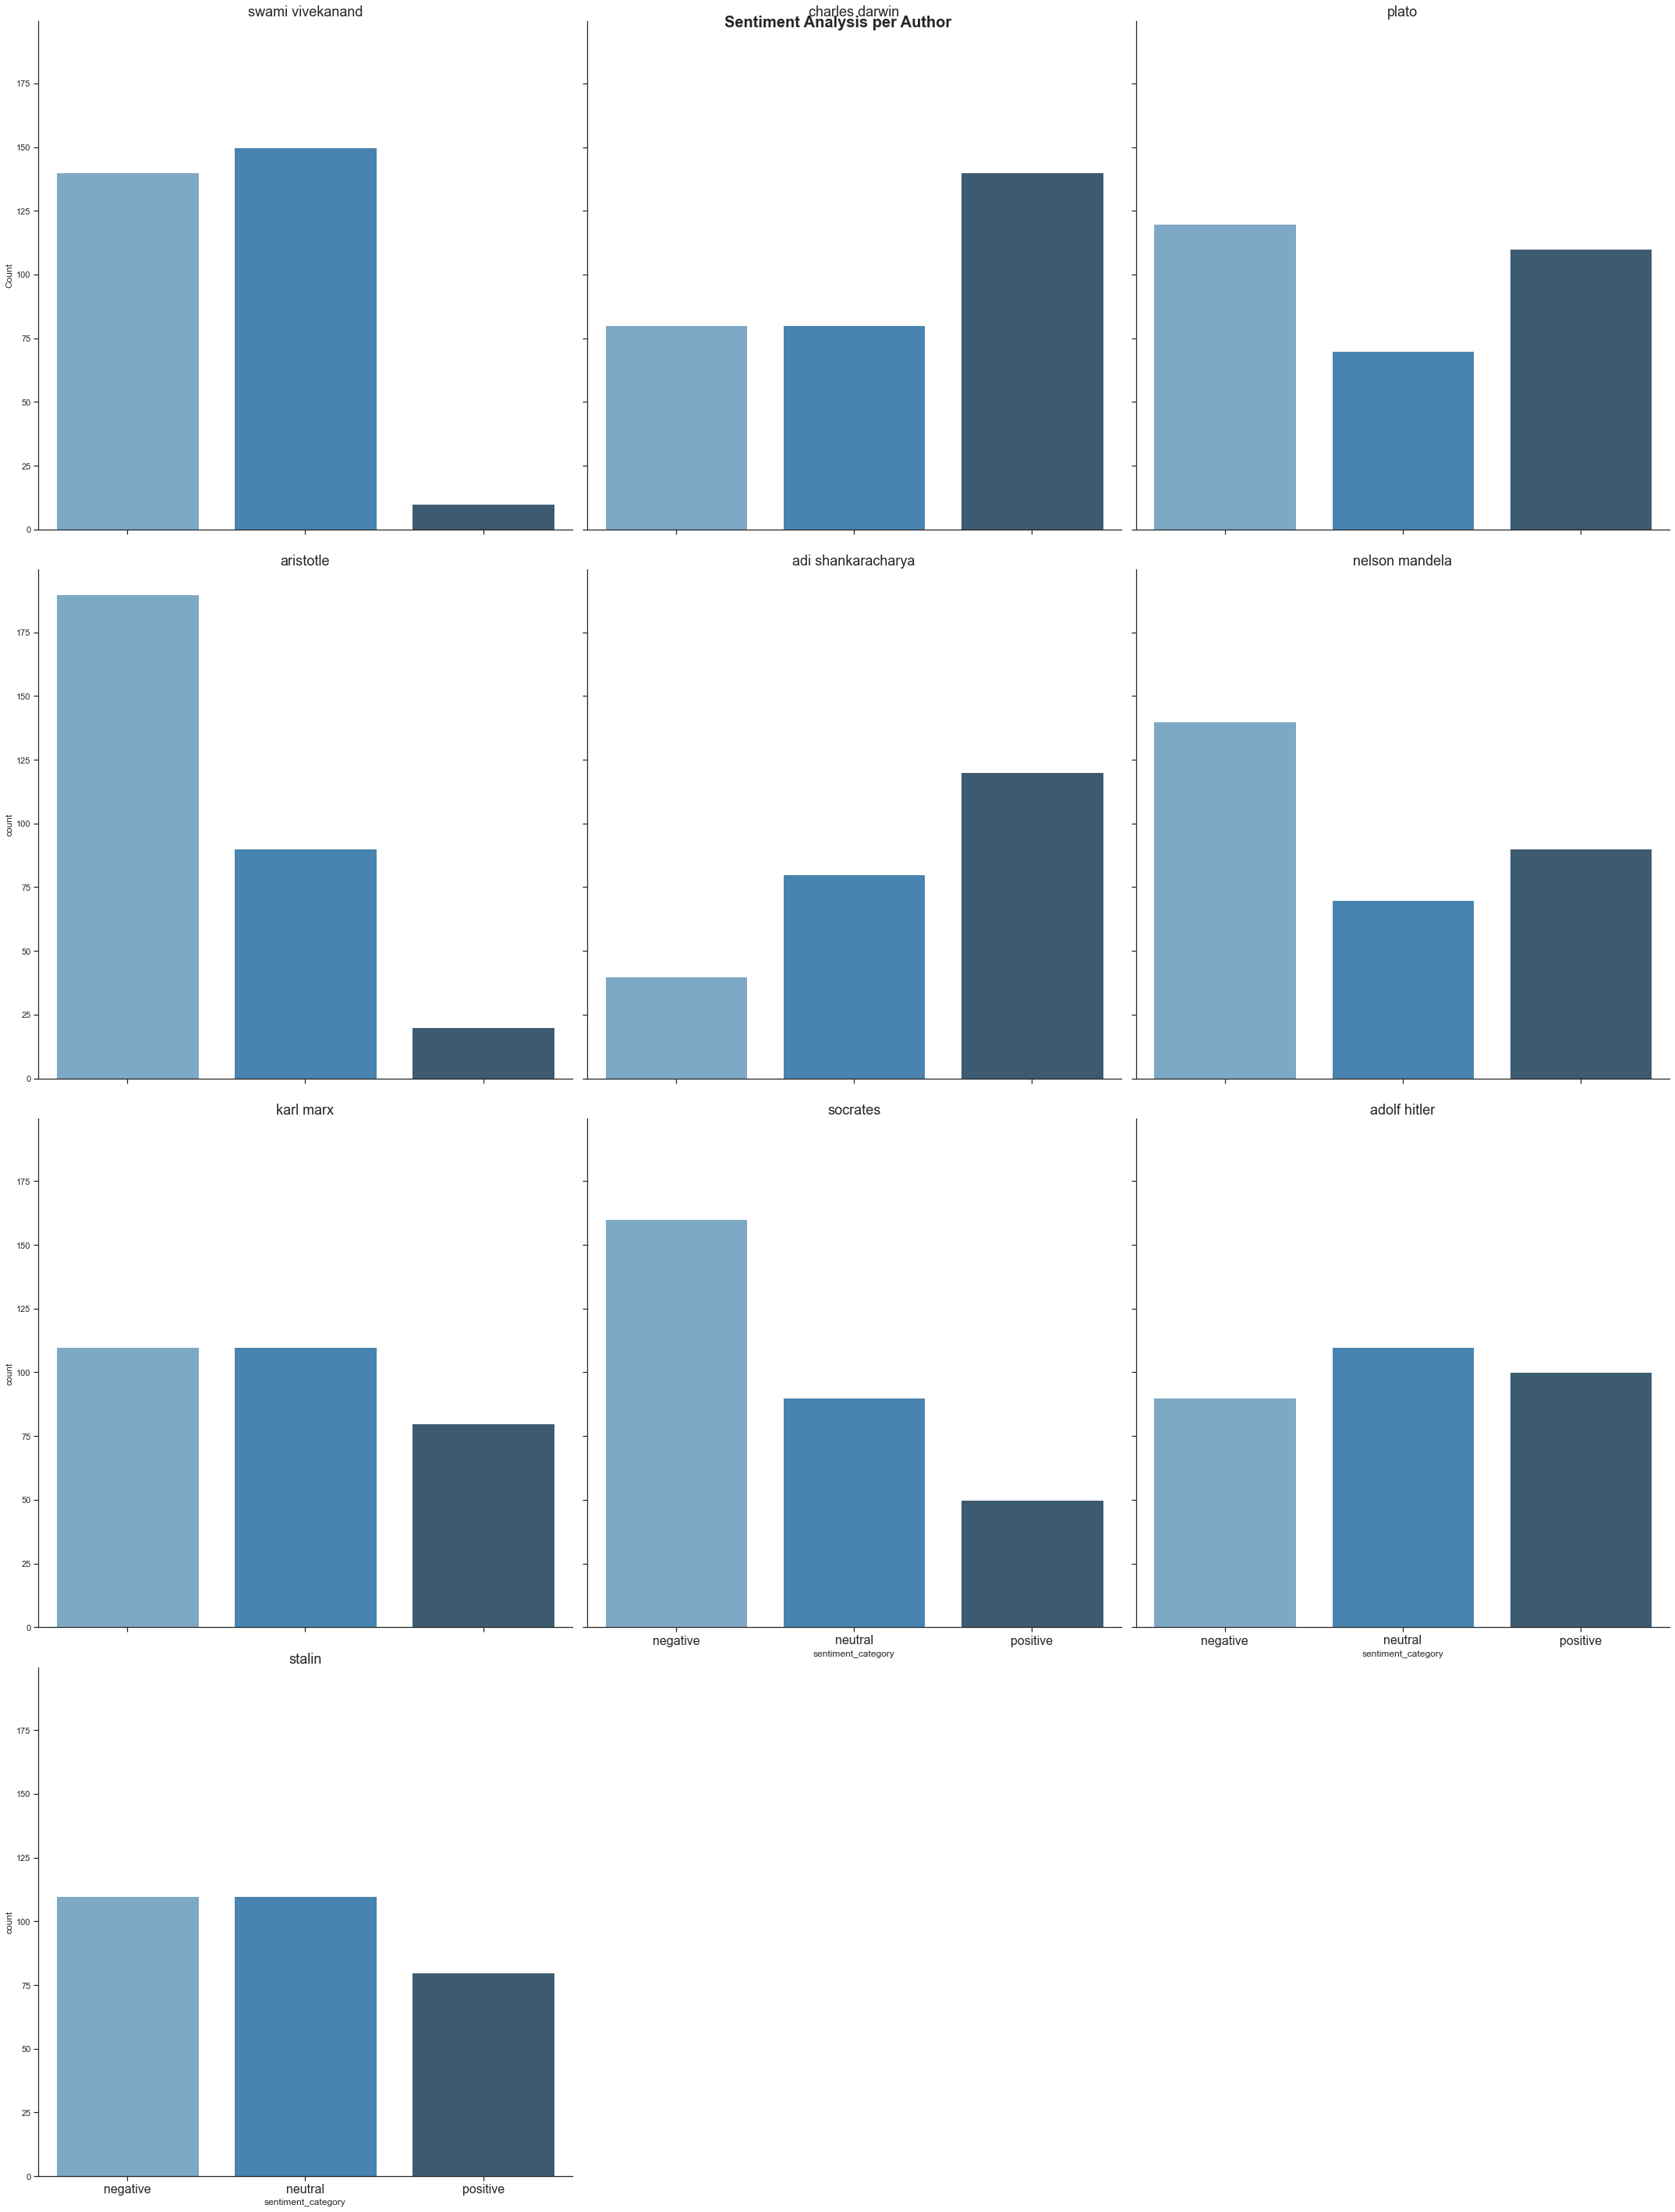

In [212]:
g = sns.FacetGrid(sentiment_df, col='authors', height=10,col_wrap = 3)

g.map_dataframe(sns.countplot,data=sentiment_df, x='sentiment_category',palette="Blues_d")

g.set_titles(col_template="{col_name}", row_template="{row_name}", size = 18)
g.set_xticklabels(rotation = 0, size = 16) 
g.fig.subplots_adjust(top=.5)
g.fig.suptitle('Sentiment Analysis per Author',fontsize=20, weight = 'bold')

axes = g.axes.flatten()
axes[0].set_ylabel('Count')

g.fig.tight_layout()

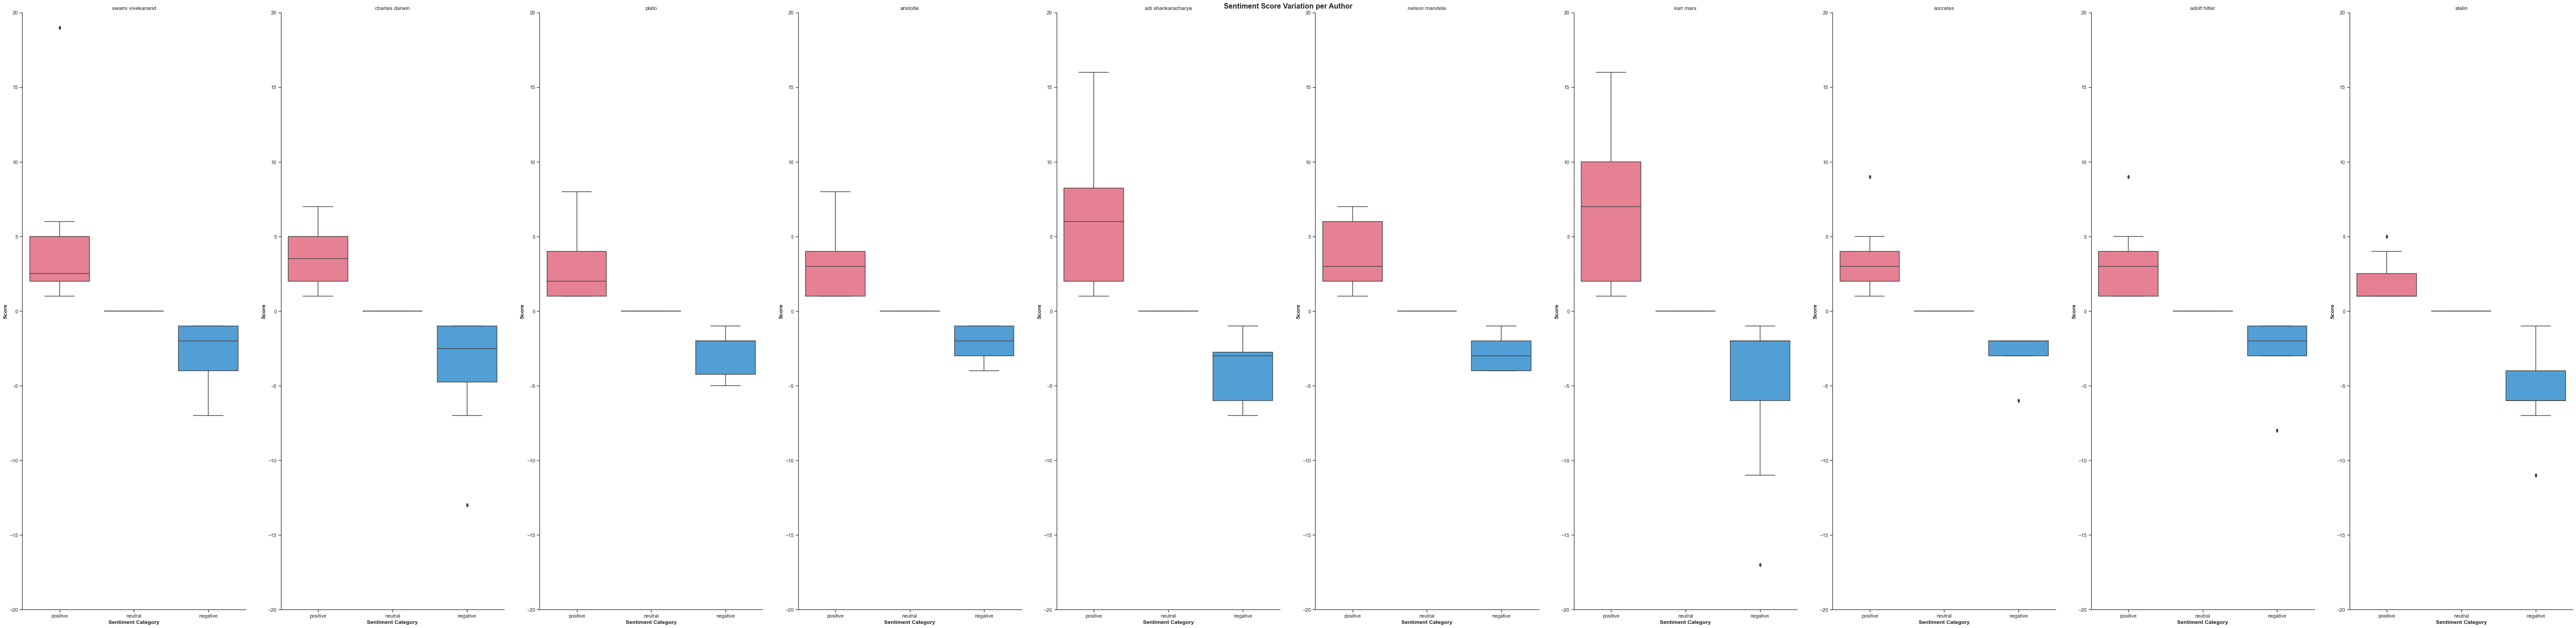

In [213]:
auth=sentiment_df.authors.unique()
fig, axarr = plt.subplots(1,10, figsize=(80, 20))

z = 0
for j in auth:
    df = sentiment_df[sentiment_df['authors'] == j]
    ax = sns.boxplot(data = df, x = 'sentiment_category', y = 'score', ax=axarr[z],palette = 'husl', order=["positive", "neutral", "negative"])
    ax.set(ylim=(-20, 20))
    axarr[z].set_title(j)
    axarr[z].set_xlabel('Sentiment Category',fontsize = 12,weight = 'bold')
    axarr[z].set_ylabel('Score',fontsize = 12,weight = 'bold')
    z +=1

sns.despine(top=True, right=True, left=False, bottom=False)
fig.tight_layout(pad=3.0)
plt.suptitle('Sentiment Score Variation per Author',fontsize=16, weight = 'bold');

,quotes,authors,score,sentiment_category
0,Take up one idea. Make that one idea your life...,swami vivekanand,2.0,positive
1,You have to grow from the inside out. None can...,swami vivekanand,-1.0,negative
2,"In a conflict between the heart and the brain,...",swami vivekanand,-2.0,negative
3,"In a day, when you don't come across any probl...",swami vivekanand,-4.0,negative
4,"The great secret of true success, of true happ...",swami vivekanand,19.0,positive
...,...,...,...,...
2935,We don't let them have ideas. Why would we let...,stalin,0.0,neutral
2936,Advance towards socialism cannot but cause the...,stalin,-4.0,negative
2937,History shows that there are no invincible arm...,stalin,1.0,positive
2938,"Undoubtedly, our path is not of the easiest; b...",stalin,-1.0,negative


In [244]:
auth=sentiment_df.authors.unique()
df1=sentiment_df
auth

array(['swami vivekanand', 'charles darwin', 'plato', 'aristotle',
       'adi shankaracharya', 'nelson mandela', 'karl marx', 'socrates',
       'adolf hitler', 'stalin'], dtype=object)

In [247]:
freqs_author, words = build_freqs(df1['quotes'], df1['authors'])

freq_words = []

for word in words:
    vivekanand = 0
    darwin = 0
    plato = 0
    aristotle = 0
    shankaracharya = 0
    mandela = 0
    marx = 0
    socrates = 0
    hitler = 0
    stalin = 0
    if (word, 'swami vivekanand') in freqs_author:
        vivekanand = freqs_author[(word, 'swami vivekanand')]
    if (word, 'plato') in freqs_author:
        plato = freqs_author[(word, 'plato')]
    if (word, 'charles darwin') in freqs_author:
        darwin = freqs_author[(word, 'charles darwin')]  
    if (word, 'aristotle') in freqs_author:
        aristotle = freqs_author[(word, 'aristotle')]
    if (word, 'adi shankaracharya') in freqs_author:
        shankaracharya = freqs_author[(word, 'adi shankaracharya')]
    if (word, 'nelson mandela') in freqs_author:
        mandela = freqs_author[(word, 'nelson mandela')]
    if (word, 'karl marx') in freqs_author:
        marx = freqs_author[(word, 'karl marx')]
    if (word, 'socrates') in freqs_author:
        socrates = freqs_author[(word, 'socrates')]
    if (word, 'adolf hitler') in freqs_author:
        hitler = freqs_author[(word, 'adolf hitler')]
    if (word, 'stalin') in freqs_author:
        stalin = freqs_author[(word, 'stalin')]
    freq_words.append([word,vivekanand, darwin, plato, aristotle, shankaracharya, mandela, marx, socrates, hitler,stalin])   

freq_wordsDF = pd.DataFrame(freq_words, columns = ['word', 'swami vivekanand', 'charles darwin', 'plato', 'aristotle', 'adi shankaracharya', 'nelson mandela', 'karl marx', 'socrates', 'adolf hitler','stalin'])    
freq_wordsDF['sum'] =  freq_wordsDF.loc[:, ['swami vivekanand', 'charles darwin', 'plato', 'aristotle', 'adi shankaracharya', 'nelson mandela', 'karl marx', 'socrates', 'adolf hitler','stalin']].sum(axis=1)
freq_wordsDF.sort_values('sum', ascending=False,inplace=True)
freq_wordsDF.drop_duplicates(inplace=True)

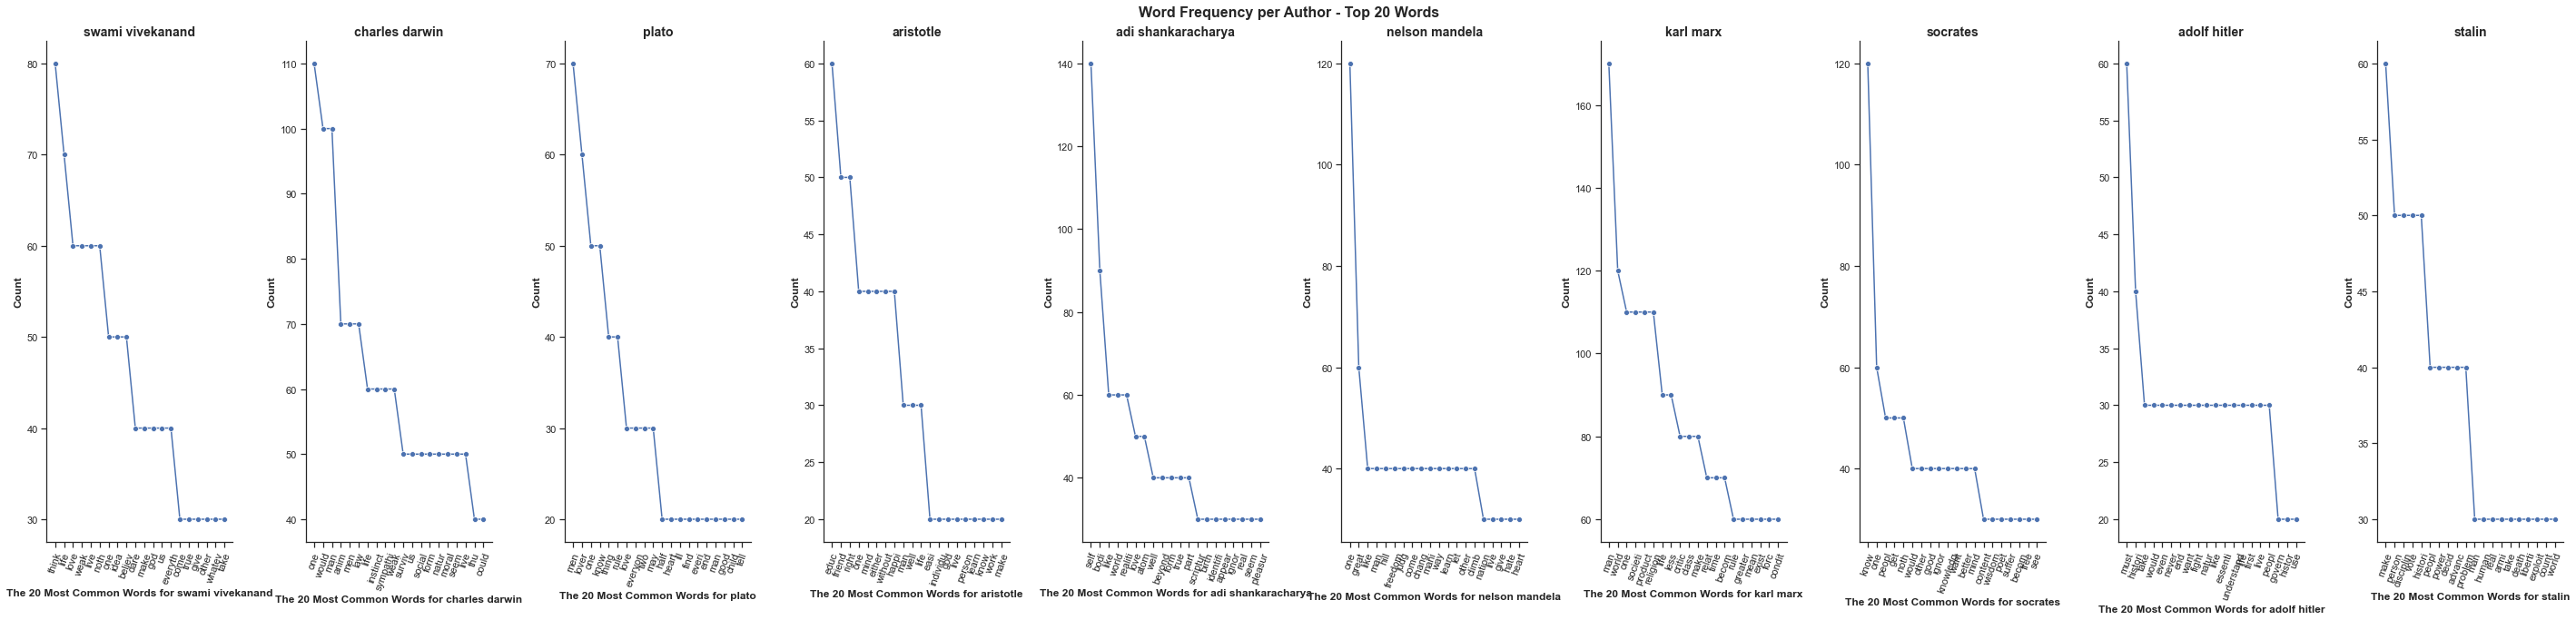

In [254]:
z = 0; j = 0
fig, axarr = plt.subplots(1,10, figsize=(40, 10))

authors_abbr = list(auth)

for i in authors_abbr:
    df = freq_wordsDF.loc[:,['word',i]]
    df.sort_values(i, ascending=False,inplace=True)
    ax = sns.lineplot(data=df[0:20],x="word", y=i, marker='o',ax=axarr[z])
    axarr[z].tick_params(axis='x', rotation=70)    
    axarr[z].set_xlabel('The 20 Most Common Words for ' + i,fontsize = 12,weight = 'bold')
    axarr[z].set_ylabel('Count',fontsize = 12,weight = 'bold')
    axarr[z].set_title(i, fontsize = 14,weight = 'bold');
    sns.despine(top=True, right=True, left=False, bottom=False)
    z+=1
    #print(FreqDF[0:15]['word'])
    
fig.tight_layout(pad=3.0)
plt.suptitle('Word Frequency per Author - Top 20 Words',fontsize=16, weight = 'bold');
plt.show()

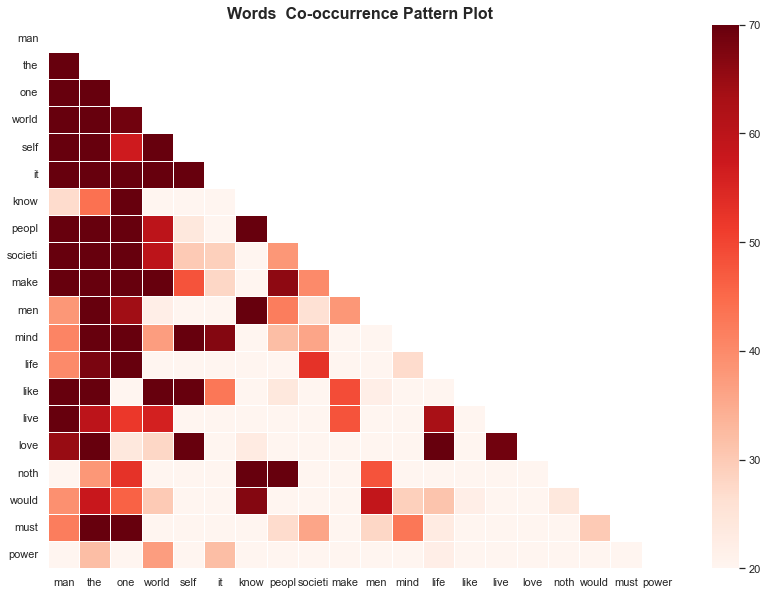

In [255]:
Corpus = df1['quotes'].sample(frac=0.6, random_state=1) #extract sample from Dataset, Adding the whole dataset does not change the pattern
Corpus = list(Corpus) #The CountVectorizer needs the inputs as list

count_model = CountVectorizer(preprocessor = preprocess_sentence, max_features = 20) #extracts the top most used words, uses my function to preprocess
CountVectData = count_model.fit_transform(Corpus) #fits and transforms to my corpus
CountVectDatac = (CountVectData.T * CountVectData) # this is co-occurrence matrix in sparse csr format
CountVectDatac.setdiag(0) # fill same word co-occurence as zero, they have much higher numbers than the remaining words

#Create DF
CountVectDF = pd.DataFrame(CountVectDatac.A, columns=count_model.get_feature_names(), index = count_model.get_feature_names()) #creates DF 
hour_count = CountVectDF.sum(axis=1) #Creates a sum column to be used to order entries

sorter = hour_count.sort_values(ascending = False).index #sorter of rows and columns
CountVectDF = CountVectDF[sorter] #sorts columns according to most occurred word
CountVectDF = CountVectDF.reindex(sorter) #sorts rows in the same order as columns

#Plot
mask = np.zeros_like(CountVectDF)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14,10))
    ax = sns.heatmap(CountVectDF, mask=mask, vmax = 70, vmin = 20, linewidths=.8,annot=False,cmap = 'Reds',annot_kws={"size": 10},cbar=True)
plt.title('Words  Co-occurrence Pattern Plot', fontsize = 16,weight = 'bold');

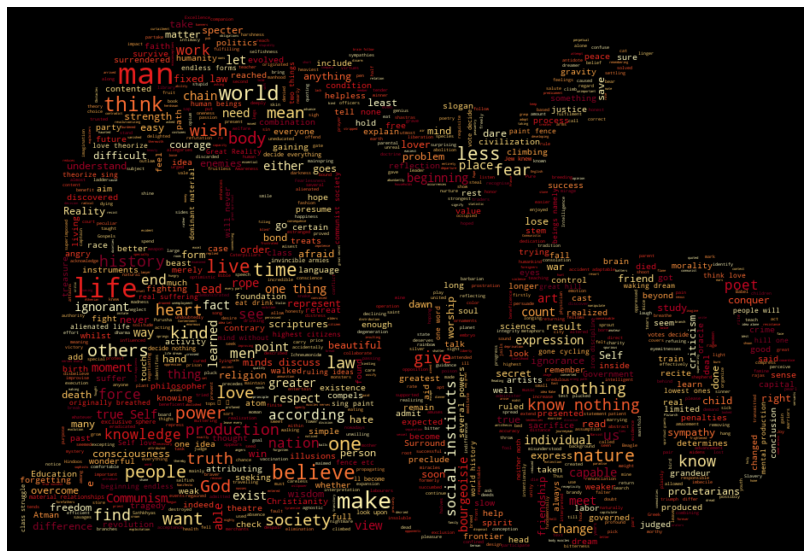

In [257]:
author_mask = np.array(Image.open(urlopen('https://github.com/negrinij/NLP-AuthorsChallenge/blob/main/images/Hallowen1.PNG?raw=true')))
   
wc = WordCloud(background_color="black",contour_width=0.1,colormap = 'YlOrRd',max_words=2000, mask=author_mask,max_font_size=36, random_state=42)
text = " ".join(review for review in df1.quotes)
wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [258]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [262]:
X_train,X_test,y_train,y_test=train_test_split(df1['quotes'],df1['authors'])

In [264]:
X_train

1049    Learning is not child's play; we cannot learn ...
2578    Obstacles do not exist to be surrendered to, b...
109     Comfort is no test of truth. Truth is often fa...
211     You have to grow from the inside out. None can...
2361    The only preventative measure one can take is ...
                              ...                        
9       Dare to be free, dare to go as far as your tho...
2856    History has shown there are no invincible armies.
604     The price good men pay for indifference to pub...
2756    Advance towards socialism cannot but cause the...
1773    The last capitalist we hang shall be the one w...
Name: quotes, Length: 2205, dtype: object

In [266]:
stop_words.update(('one','could','would'))
X_train['text_pre'] =X_train.apply(lambda x : preprocess_sentence(x))
X_test['text_pre'] = X_test.apply(lambda x : preprocess_sentence(x))

LabelEnc = preprocessing.LabelEncoder()
target_train = LabelEnc.fit_transform(df_train.author.values)
features_train = df_train.text_pre.values

features_test = df_test.text_pre.values

# Create First Train and Test sets
x_train, x_test, y_train, y_test = train_test_split(features_train, target_train, test_size=0.20,random_state=123)

print ("Training set size", x_train.shape[0])
print ("Test set size",x_test.shape[0])

TypeError: expected string or bytes-like object